In [1]:
# import statements
import pandas as pd
from pandas import DataFrame
from numpy import nan
import csv
from matplotlib import pyplot as plt
import os

In [2]:
# read the assay files and load the data into a data frame
def load_df(filename):
    f = open(filename)
    data_raw = f.read()
    f.close()

    data1 = data_raw.split('\n')
    data2 = data1[1:]
    header = data1[0]
    indices = header.split('\t')
    data3 = [i.split('\t') for i in data2]
    data = DataFrame(data3, columns = indices)
    data = data.replace('', nan)
    data = data.replace('None', nan)
    data = data.dropna()
    df = data.iloc[:150] # trim to consider about 24 hrs
    for col in df: # type conversions for all columns
        if col == 'Time' or col == 'T 500':
            continue
        df.loc[:,col] = df[col].astype(float)
    return df    

In [3]:
# works for 384 (16x24) welled plate
def graph_df(df, red = []):
    fig, ax = plt.subplots(nrows = 16, ncols = 24, sharex = True, sharey = True, figsize = (20, 20))
    cols = list(df.columns[2:])
    for col in df.columns[2:]: # exclude the non-well columns
        # print(col, end=' ')
        index = cols.index(col)
        ax[index//24][index%24].plot(df.index, df[col])
        ax[index//24][index%24].get_xaxis().set_visible(False)
        ax[index//24][index%24].get_yaxis().set_visible(False)
    
    for col in red:
        index = cols.index(col)
        ax[index//24][index%24].set_facecolor('xkcd:light pastel green')
        
#         if col in red:
#             ax[index//24][index%24].set_facecolor('red')

In [4]:
# inspect 4 wells
def inspect_well(df, w1, w2, w3, w4):
    fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, sharey = True, figsize = (4,4))
    ax[0,0].plot(df.index, df[w1])
    ax[0,0].get_xaxis().set_visible(False)
    ax[0,0].get_yaxis().set_visible(False)
    ax[0,1].plot(df.index, df[w2])
    ax[0,1].get_xaxis().set_visible(False)
    ax[0,1].get_yaxis().set_visible(False)
    ax[1,0].plot(df.index, df[w3])
    ax[1,0].get_xaxis().set_visible(False)
    ax[1,0].get_yaxis().set_visible(False)
    ax[1,1].plot(df.index, df[w4])
    ax[1,1].get_xaxis().set_visible(False)
    ax[1,1].get_yaxis().set_visible(False)

In [5]:
files = ["data/"+item for item in os.listdir("data") if item.endswith('.txt')]
files

['data/Rutuja 04 06.txt',
 'data/Rutuja 04 08.txt',
 'data/Rutuja 04 09.txt',
 'data/Rutuja 04 10.txt',
 'data/Rutuja 04 28.txt',
 'data/Rutuja 04 30.txt',
 'data/Rutuja 05 03.txt',
 'data/Rutuja 05 05.txt',
 'data/Rutuja 11 02.txt']

In [6]:
df1 = load_df(files[0])
print(files[0])
df2 = load_df(files[1])
print(files[1])
df3 = load_df(files[2])
print(files[2])
df4 = load_df(files[3])
print(files[3])
df5 = load_df(files[4])
print(files[4])
df6 = load_df(files[5])
print(files[5])
df7 = load_df(files[6])
print(files[6])
df8 = load_df(files[7])
print(files[7])
df9 = load_df(files[8])
print(files[8])

data/Rutuja 04 06.txt
data/Rutuja 04 08.txt
data/Rutuja 04 09.txt
data/Rutuja 04 10.txt
data/Rutuja 04 28.txt
data/Rutuja 04 30.txt
data/Rutuja 05 03.txt
data/Rutuja 05 05.txt
data/Rutuja 11 02.txt


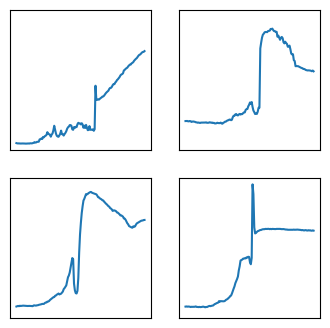

In [7]:
inspect_well(df1, "A5", "L6", "I23", "B24")

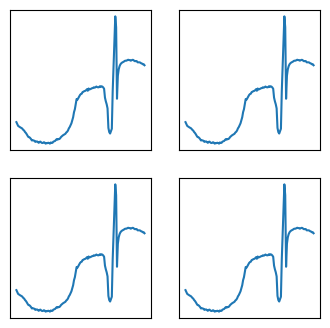

In [8]:
inspect_well(df1, "C24", "C24", "C24", "C24")

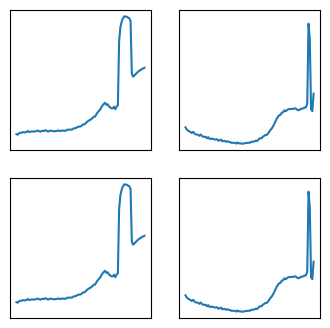

In [9]:
inspect_well(df2, "B5", "A13", "B5", "A13")

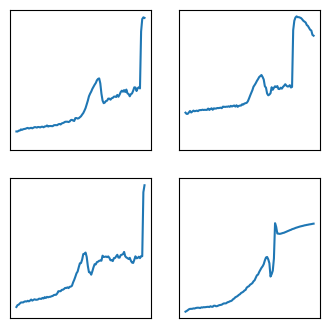

In [10]:
inspect_well(df3, "E10", "I11", "K11", "B13")

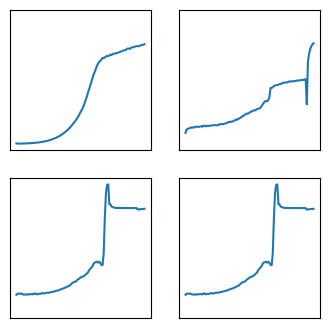

In [11]:
inspect_well(df3, "B19", "K22", "H24", "H24")

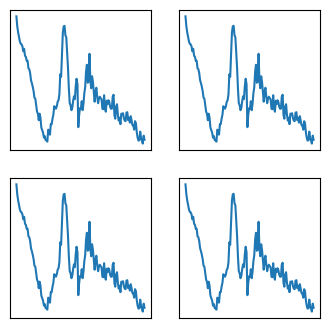

In [12]:
inspect_well(df5, "C12", "C12", "C12", "C12")

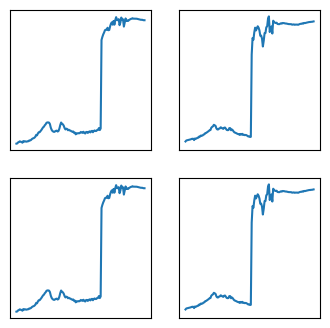

In [13]:
inspect_well(df7, "I2", "K2", "I2", "K2")

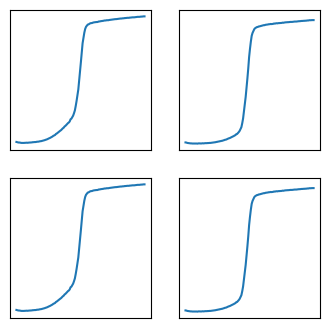

In [14]:
inspect_well(df1, "K15", "M15", "K15", "M15")

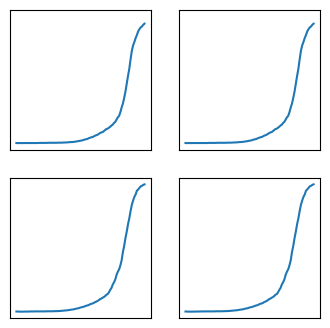

In [15]:
inspect_well(df2, "M10", "M10", "I17", "I17")

In [16]:
with open("1A.txt") as f:
    string1 = f.read()
l1 = string1.split()
l1 = list(set(l1))
len(l1)

271

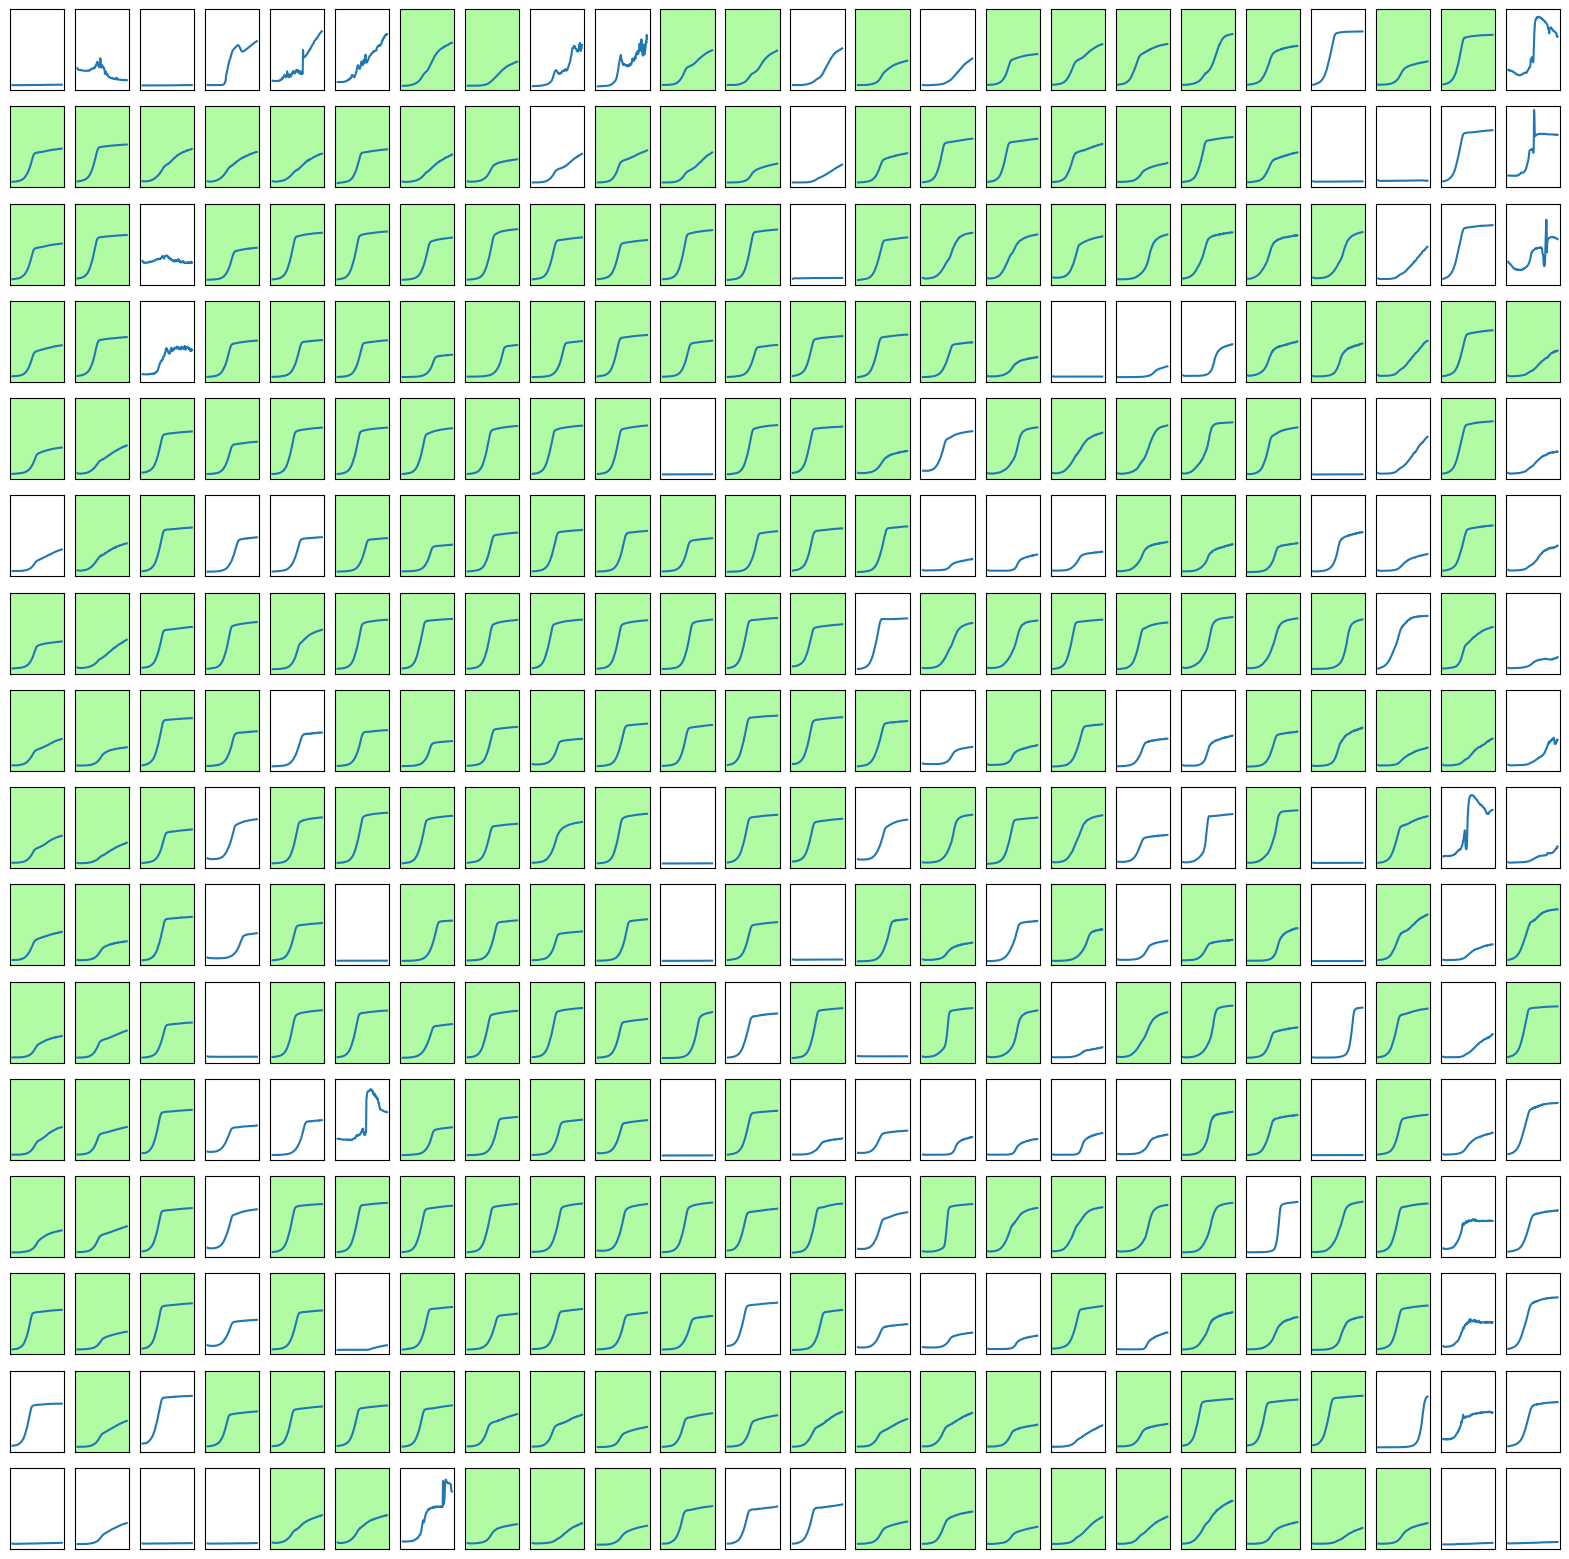

In [17]:
graph_df(df1, l1)

In [18]:
with open("1B.txt") as f:
    string2 = f.read()
l2 = string2.split()
l2 = list(set(l2))
len(l2)

151

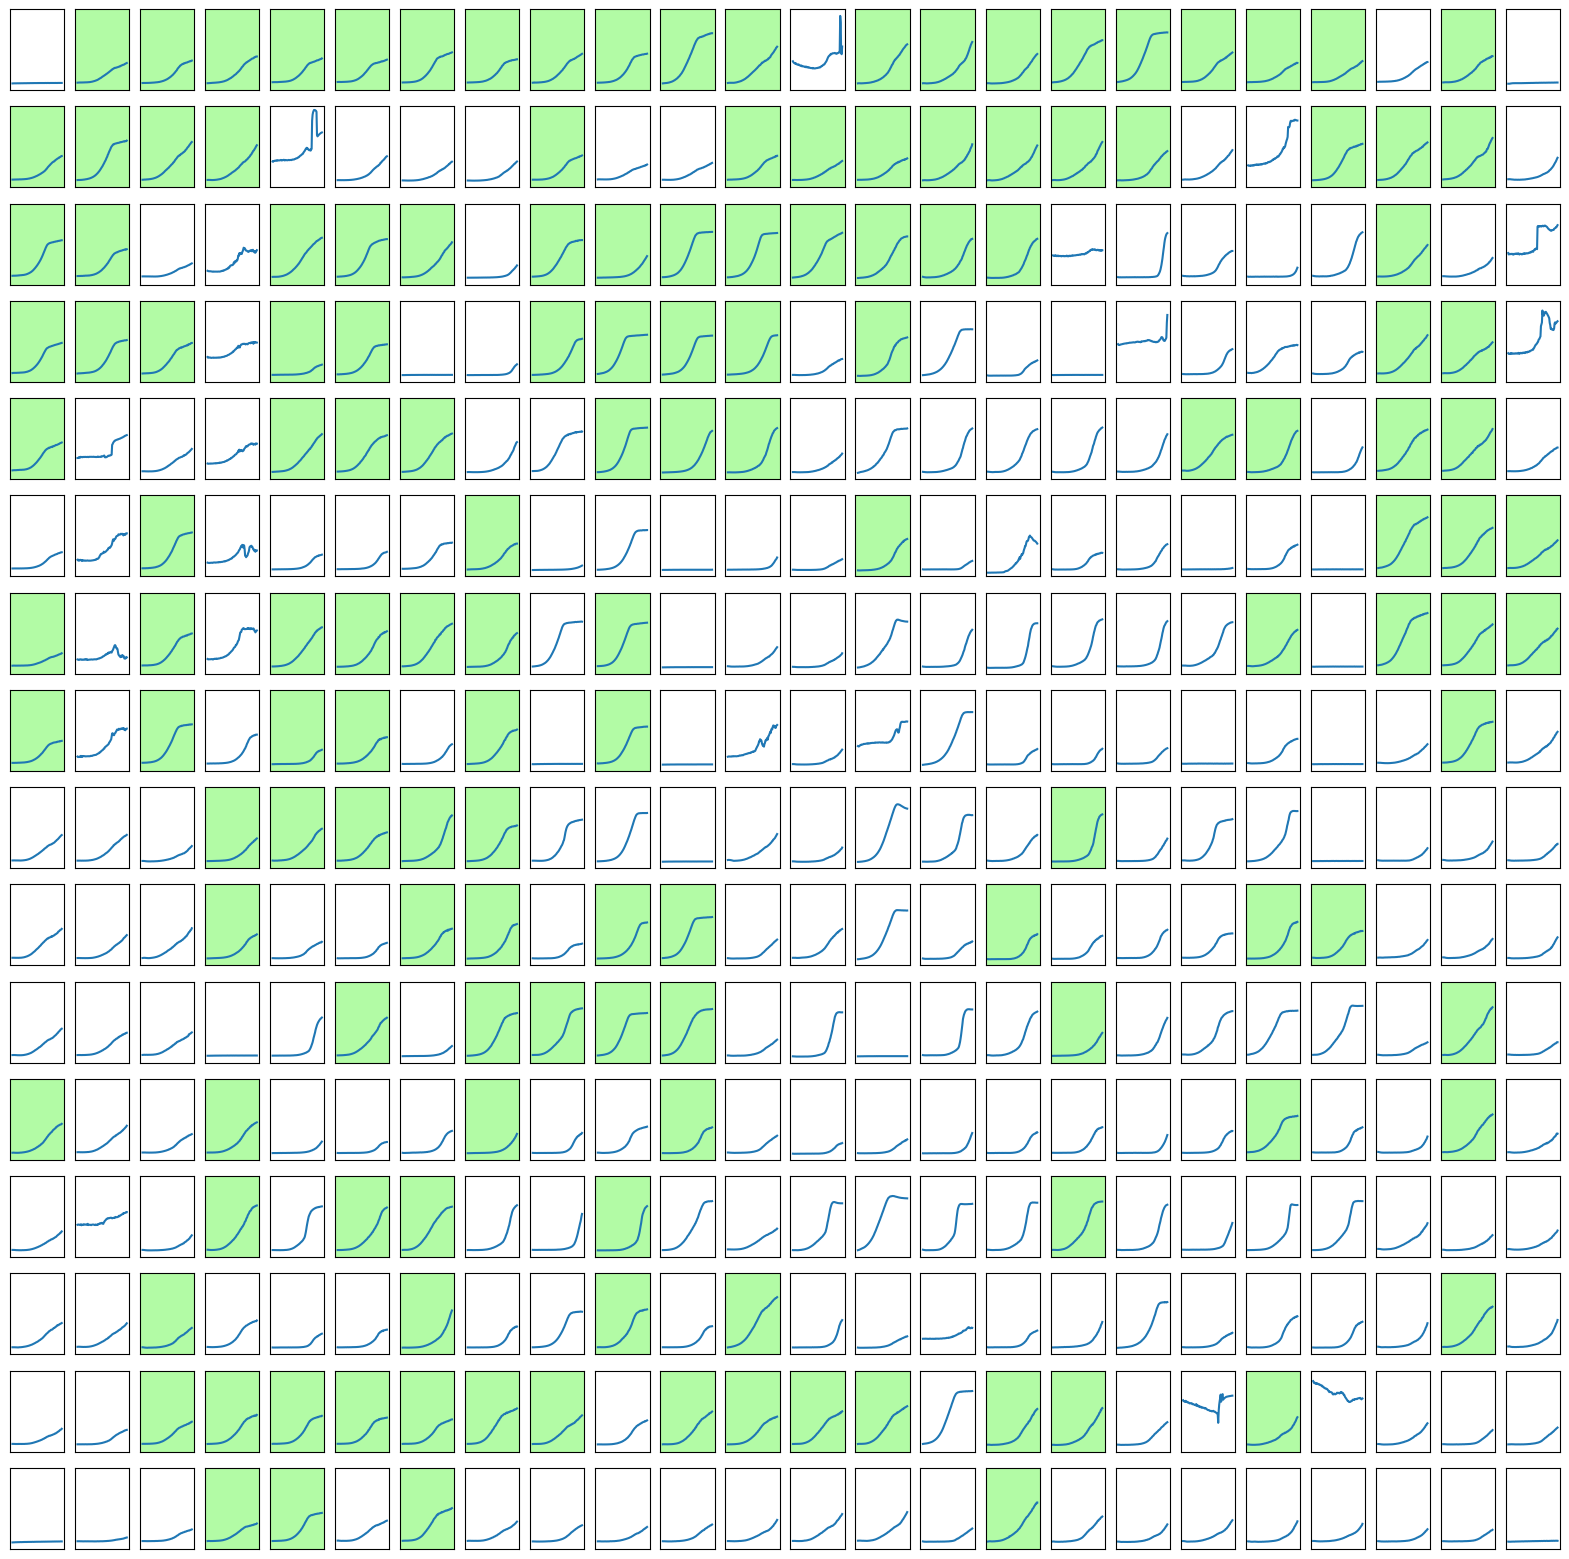

In [19]:
graph_df(df2, l2)

In [20]:
with open("1C.txt") as f:
    string3 = f.read()
l3 = string3.split()
l3 = list(set(l3))
len(l3)

255

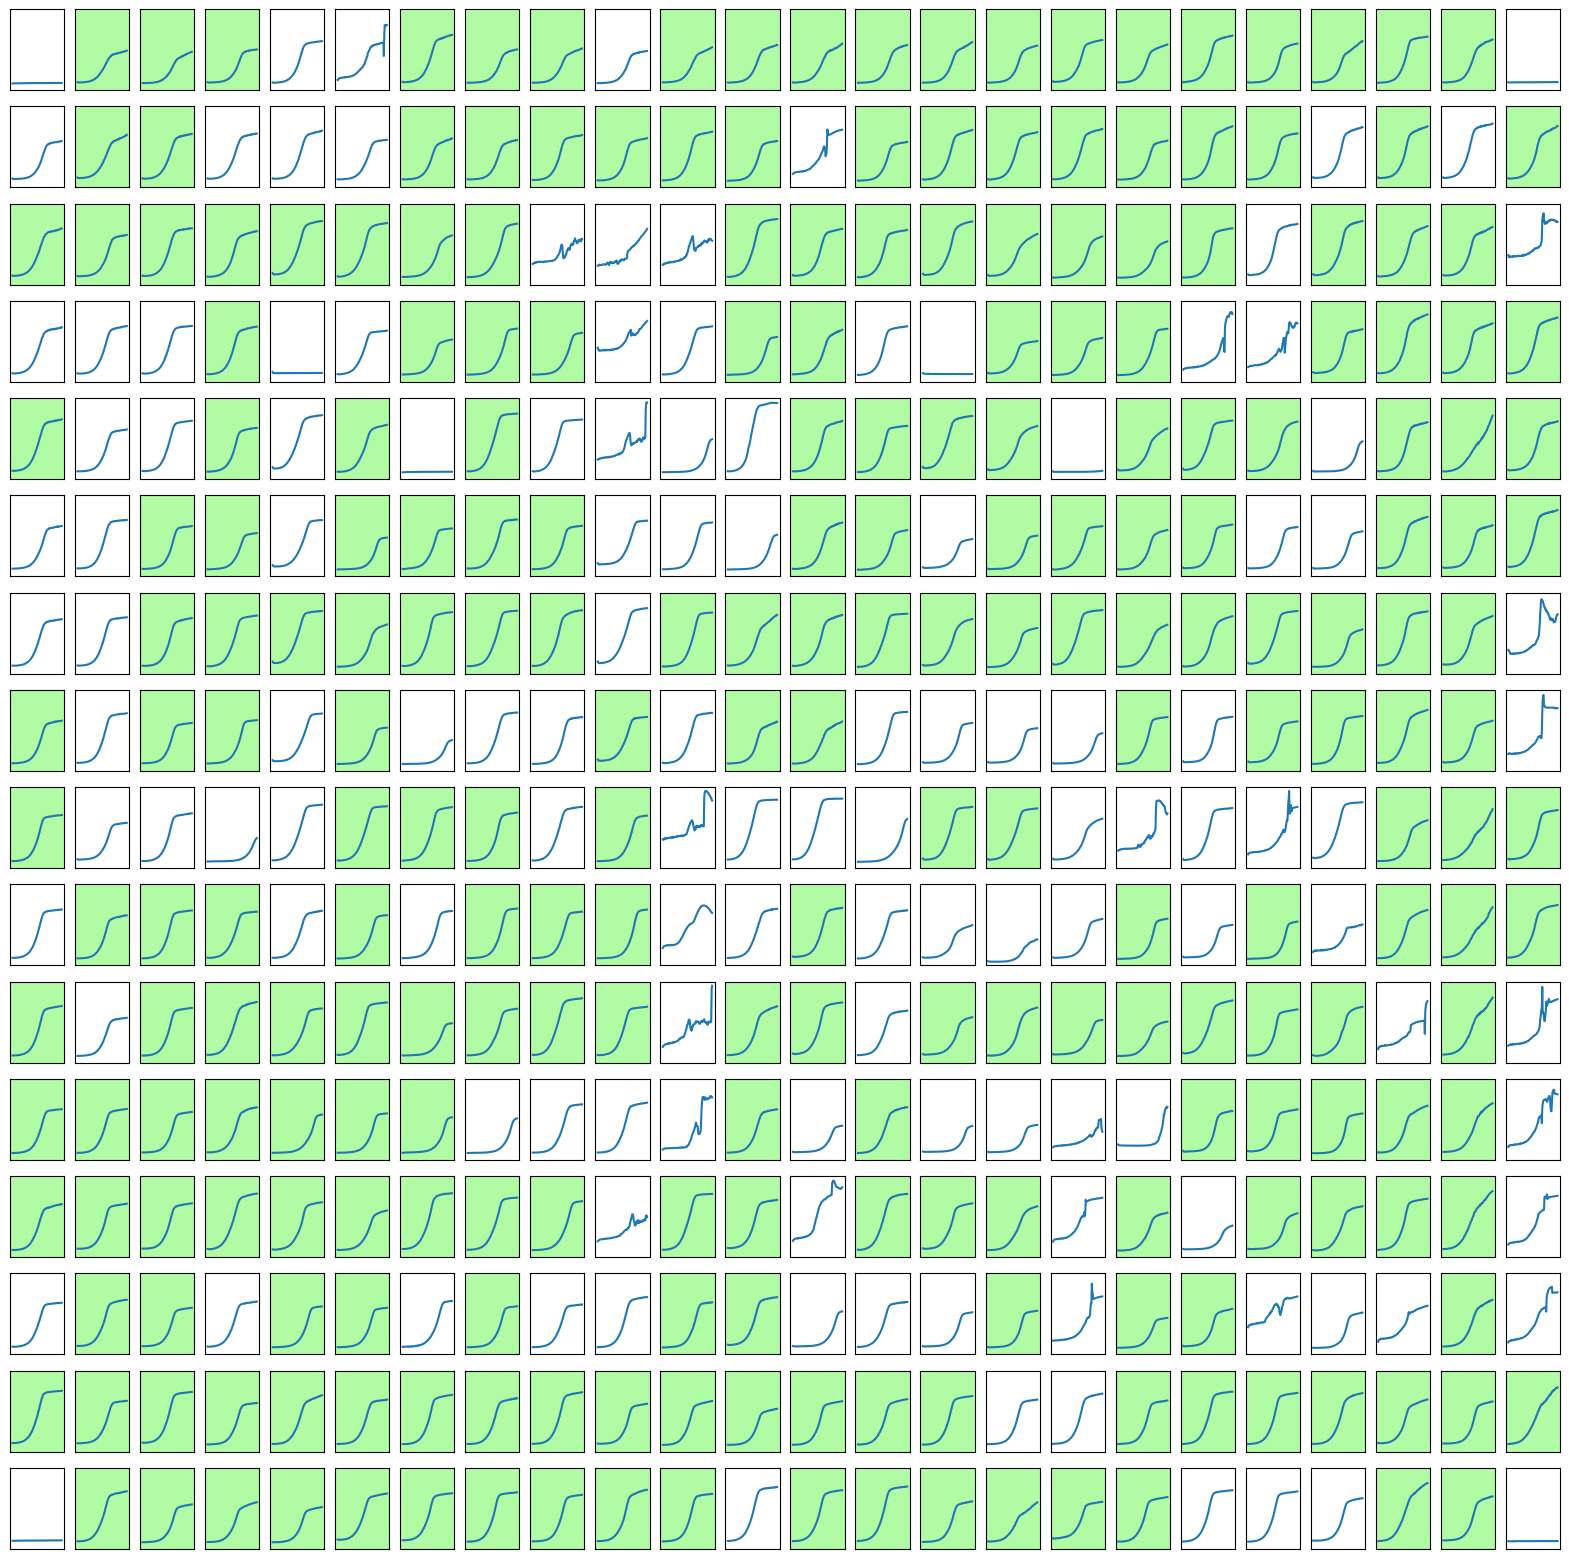

In [21]:
graph_df(df3, l3)

In [22]:
with open("1D.txt") as f:
    string4 = f.read()
l4 = string4.split()
l4 = list(set(l4))
len(l4)

244

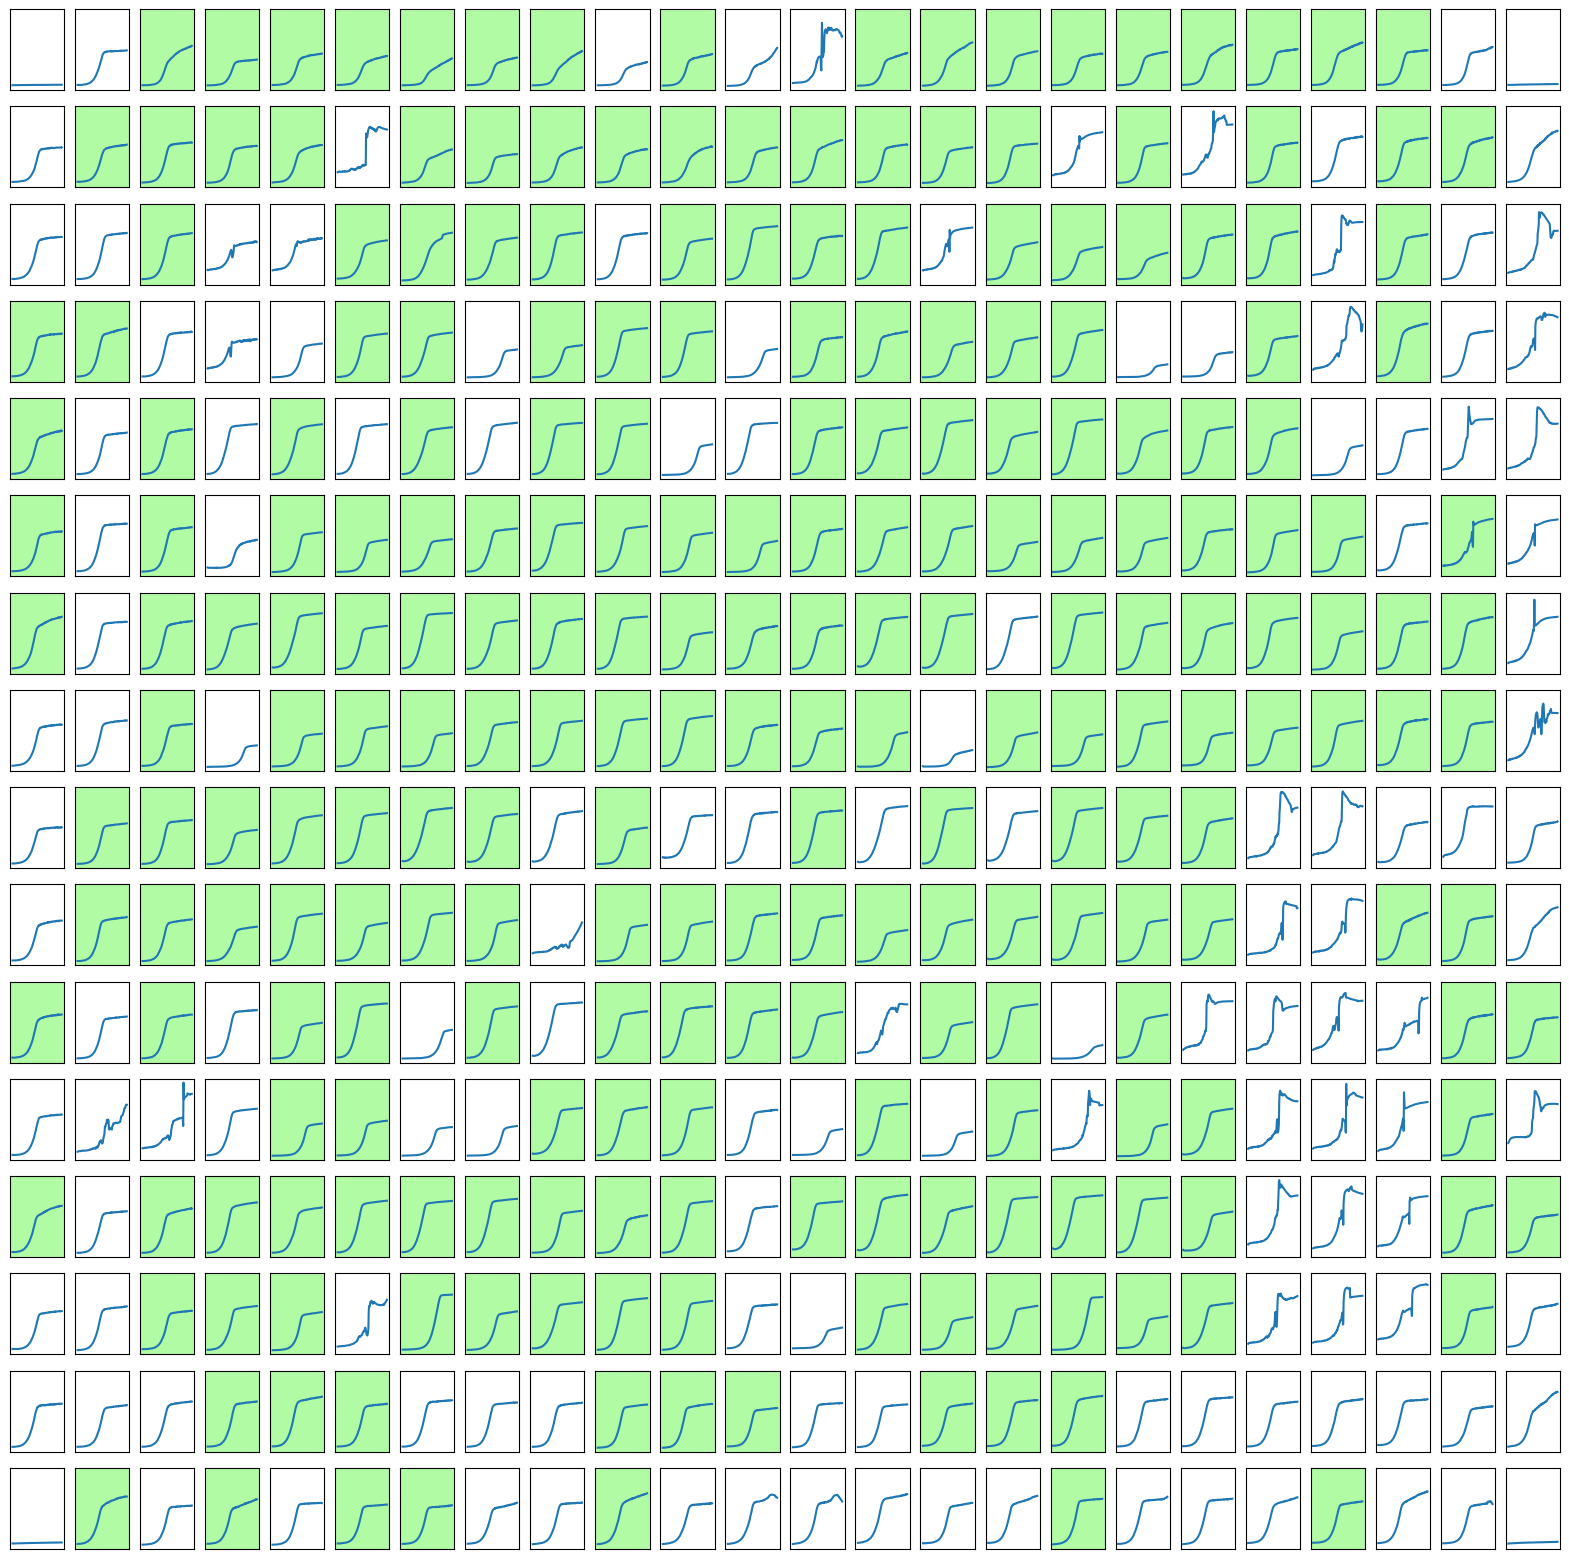

In [23]:
graph_df(df4, l4)

In [24]:
with open("2A.txt") as f:
    string5 = f.read()
l5 = string5.split()
l5 = list(set(l5))
len(l5)

85

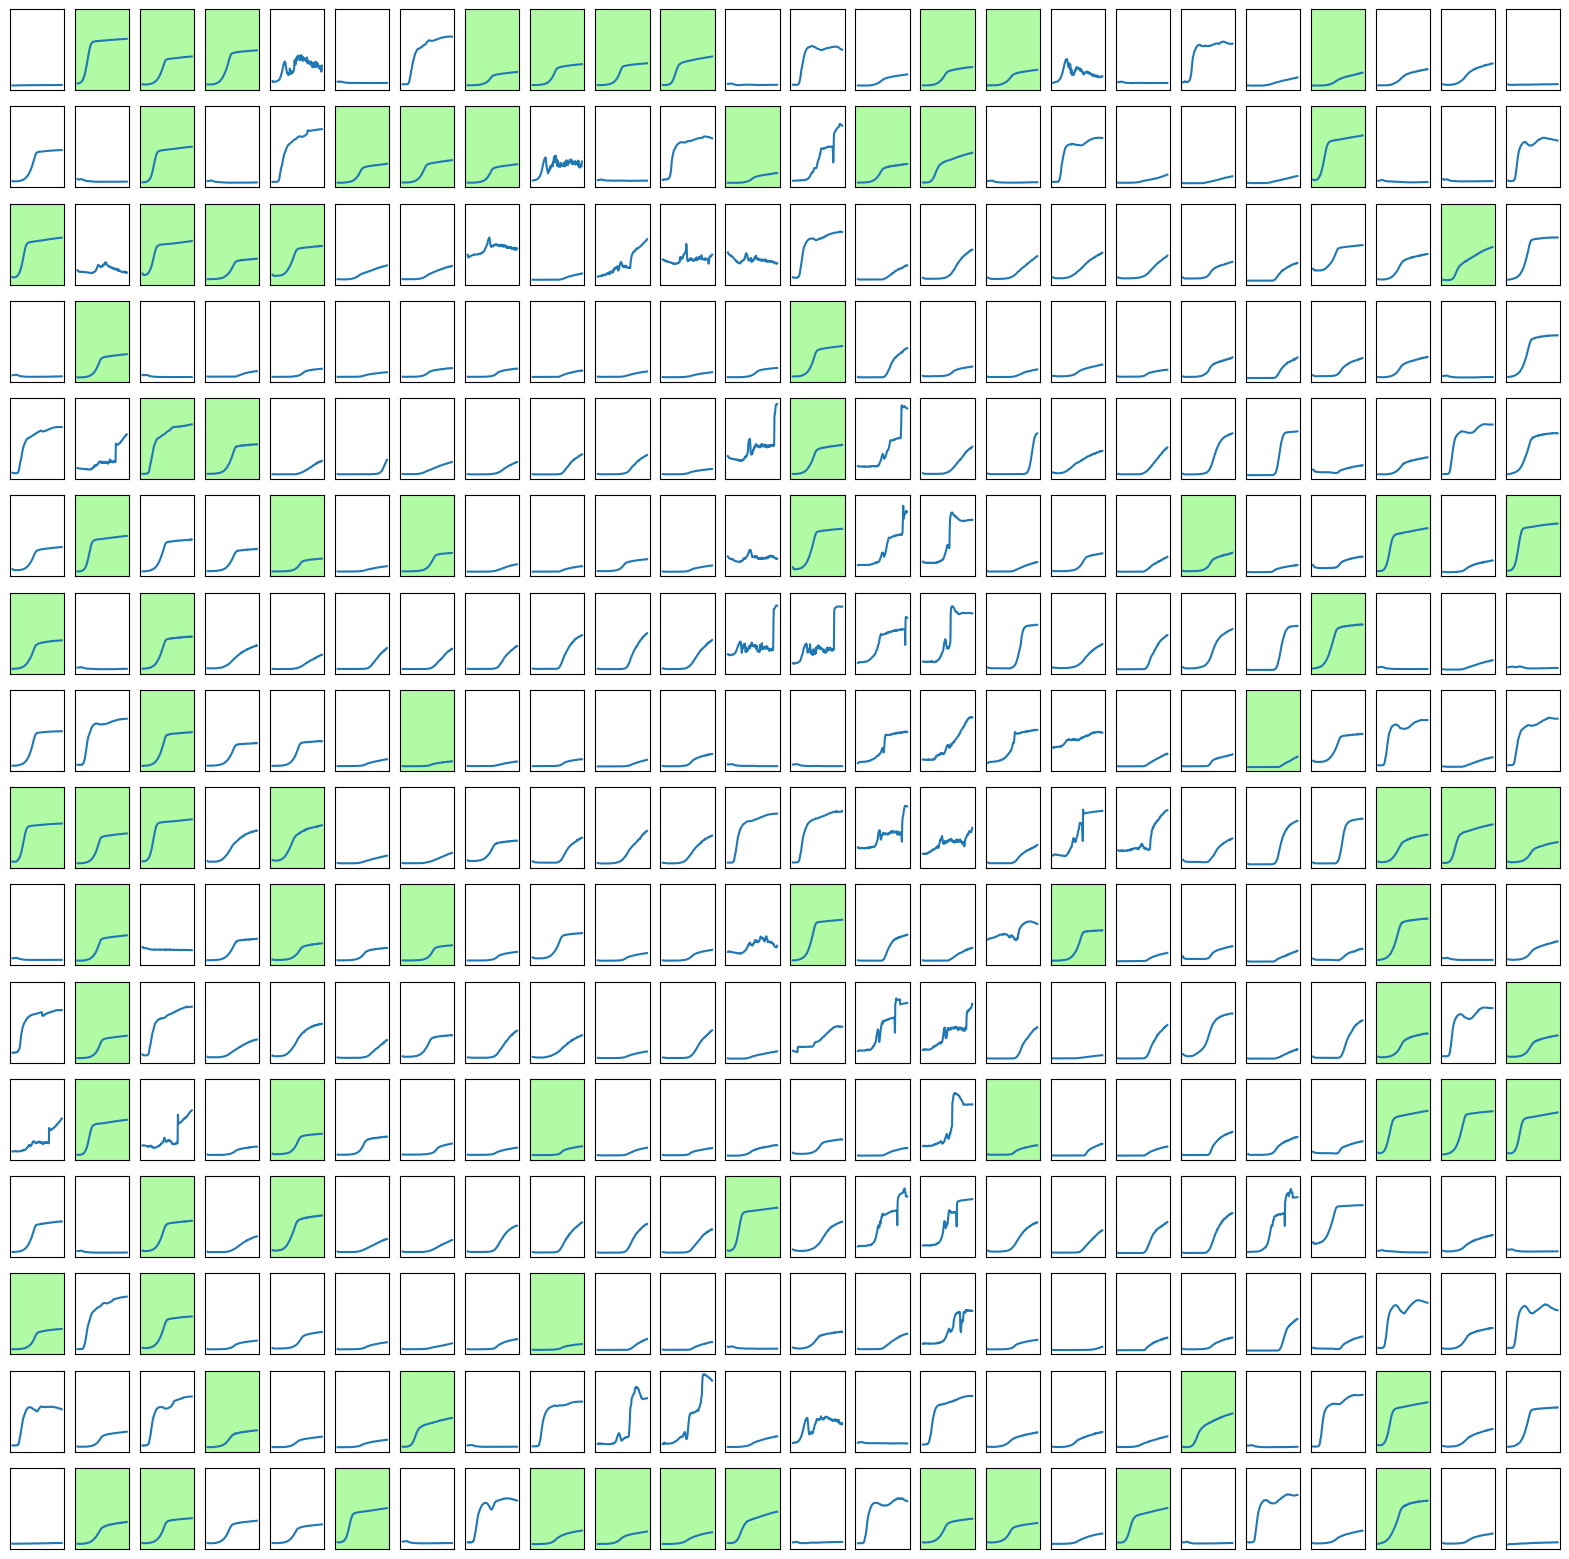

In [25]:
graph_df(df5, l5)

In [26]:
with open("2B.txt") as f:
    string6 = f.read()
l6 = string6.split()
l6 = list(set(l6))
len(l6)

220

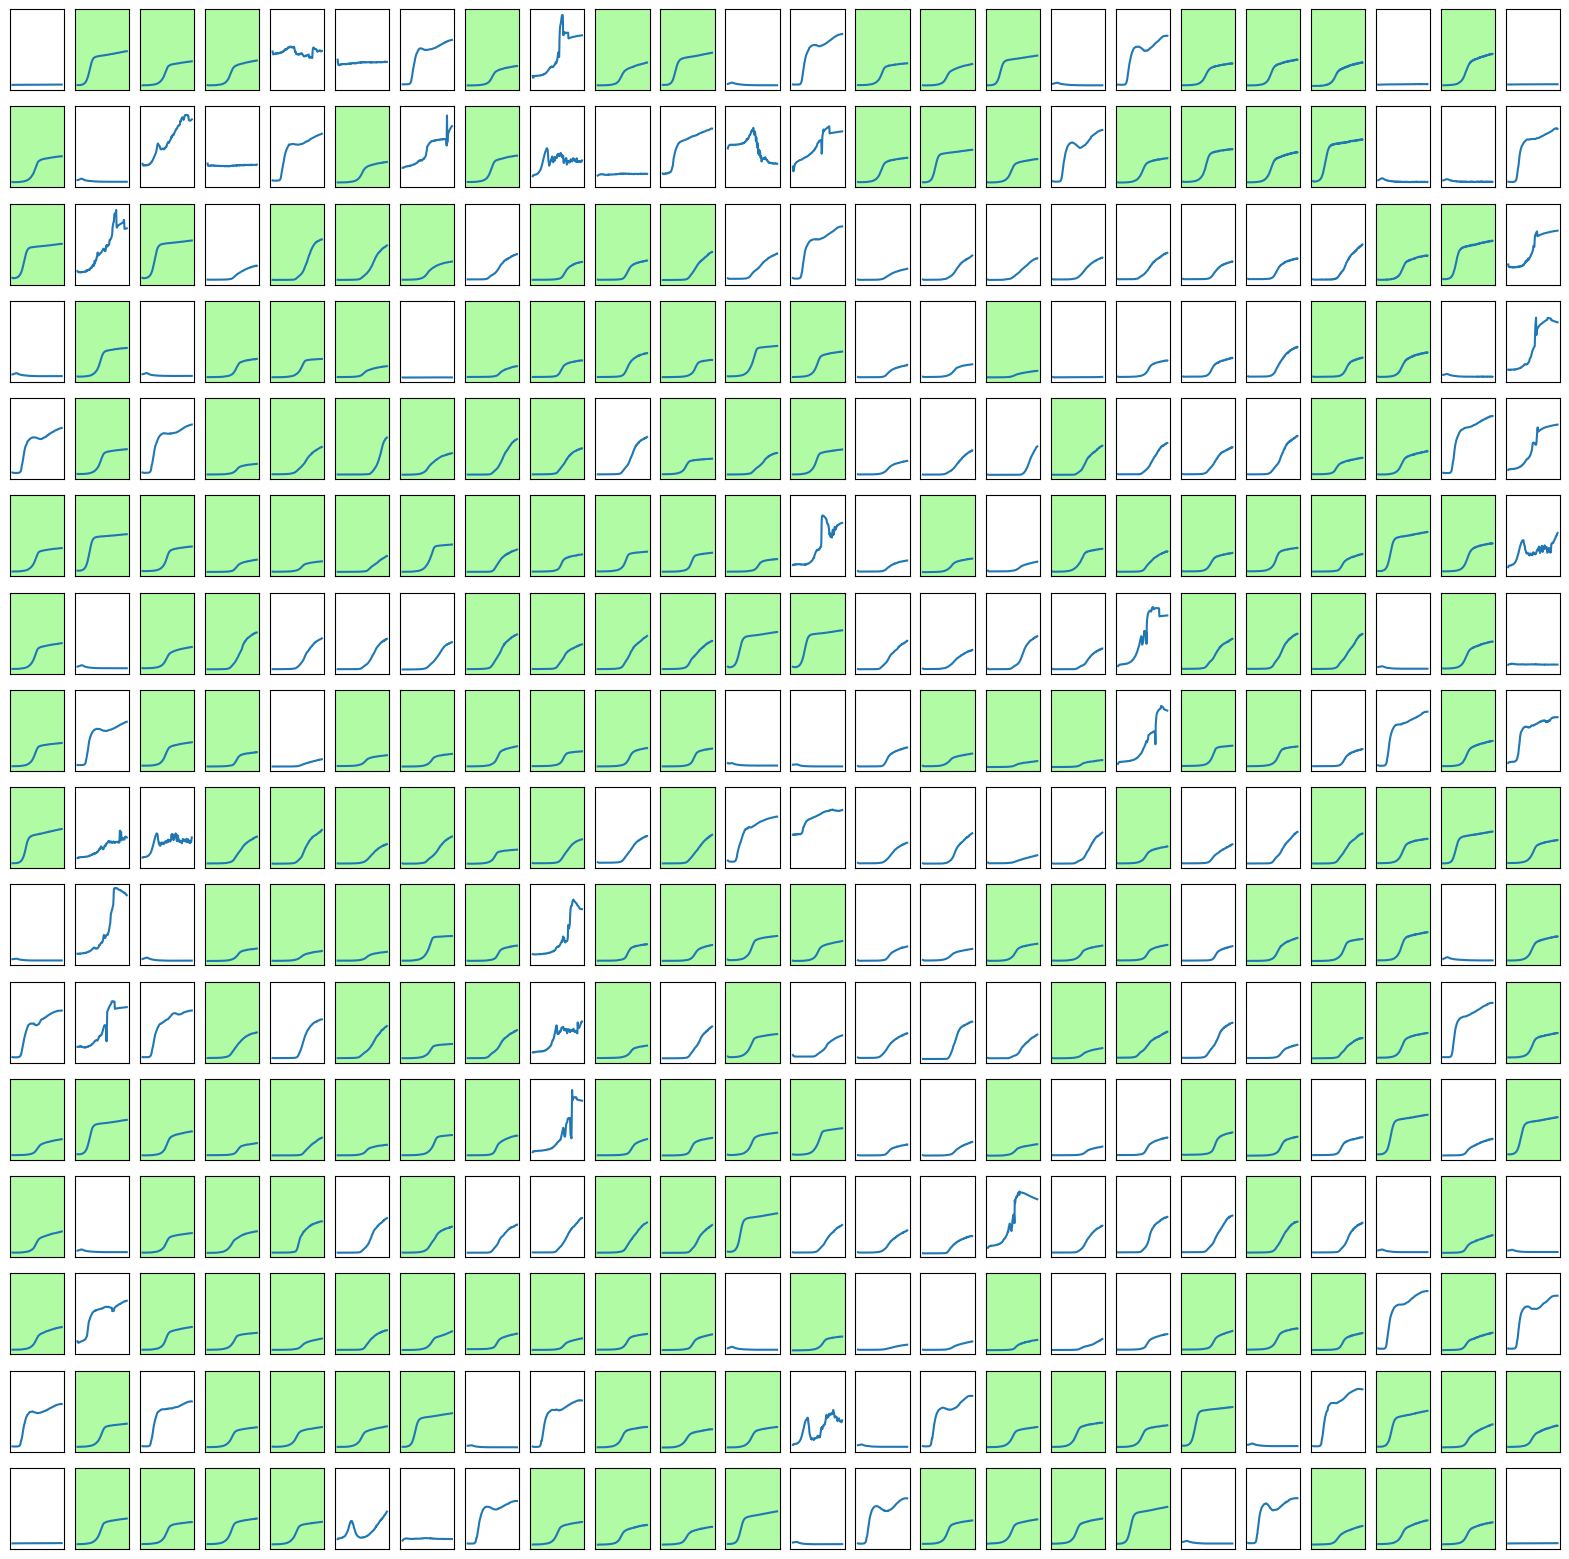

In [27]:
graph_df(df6,l6)

In [28]:
with open("2C.txt") as f:
    string7 = f.read()
l7 = string7.split()
l7 = list(set(l7))
len(l7)

223

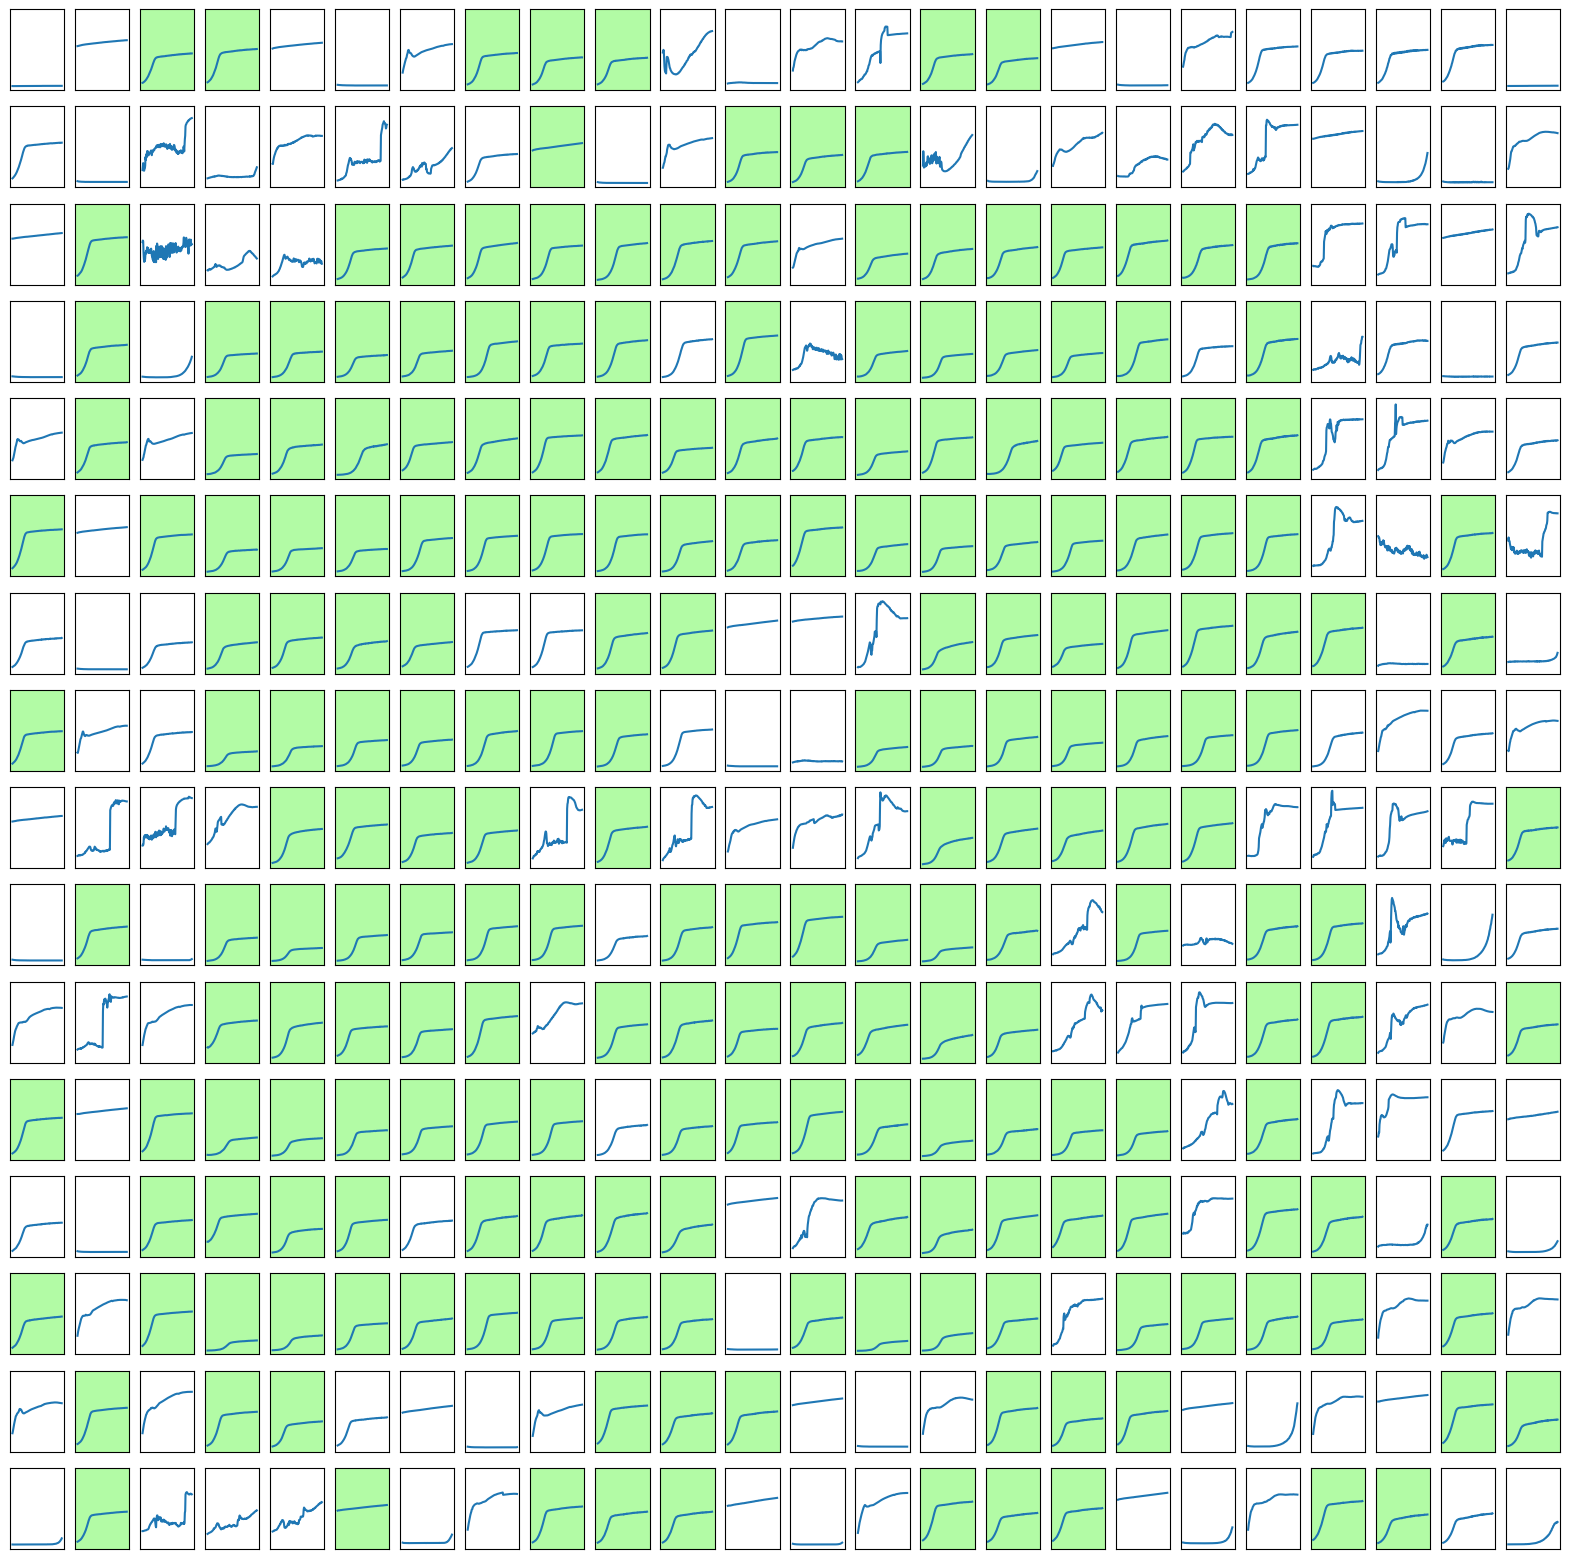

In [29]:
graph_df(df7, l7)

In [30]:
with open("2D.txt") as f:
    string8 = f.read()
l8 = string8.split()
l8 = list(set(l8))
len(l8)

262

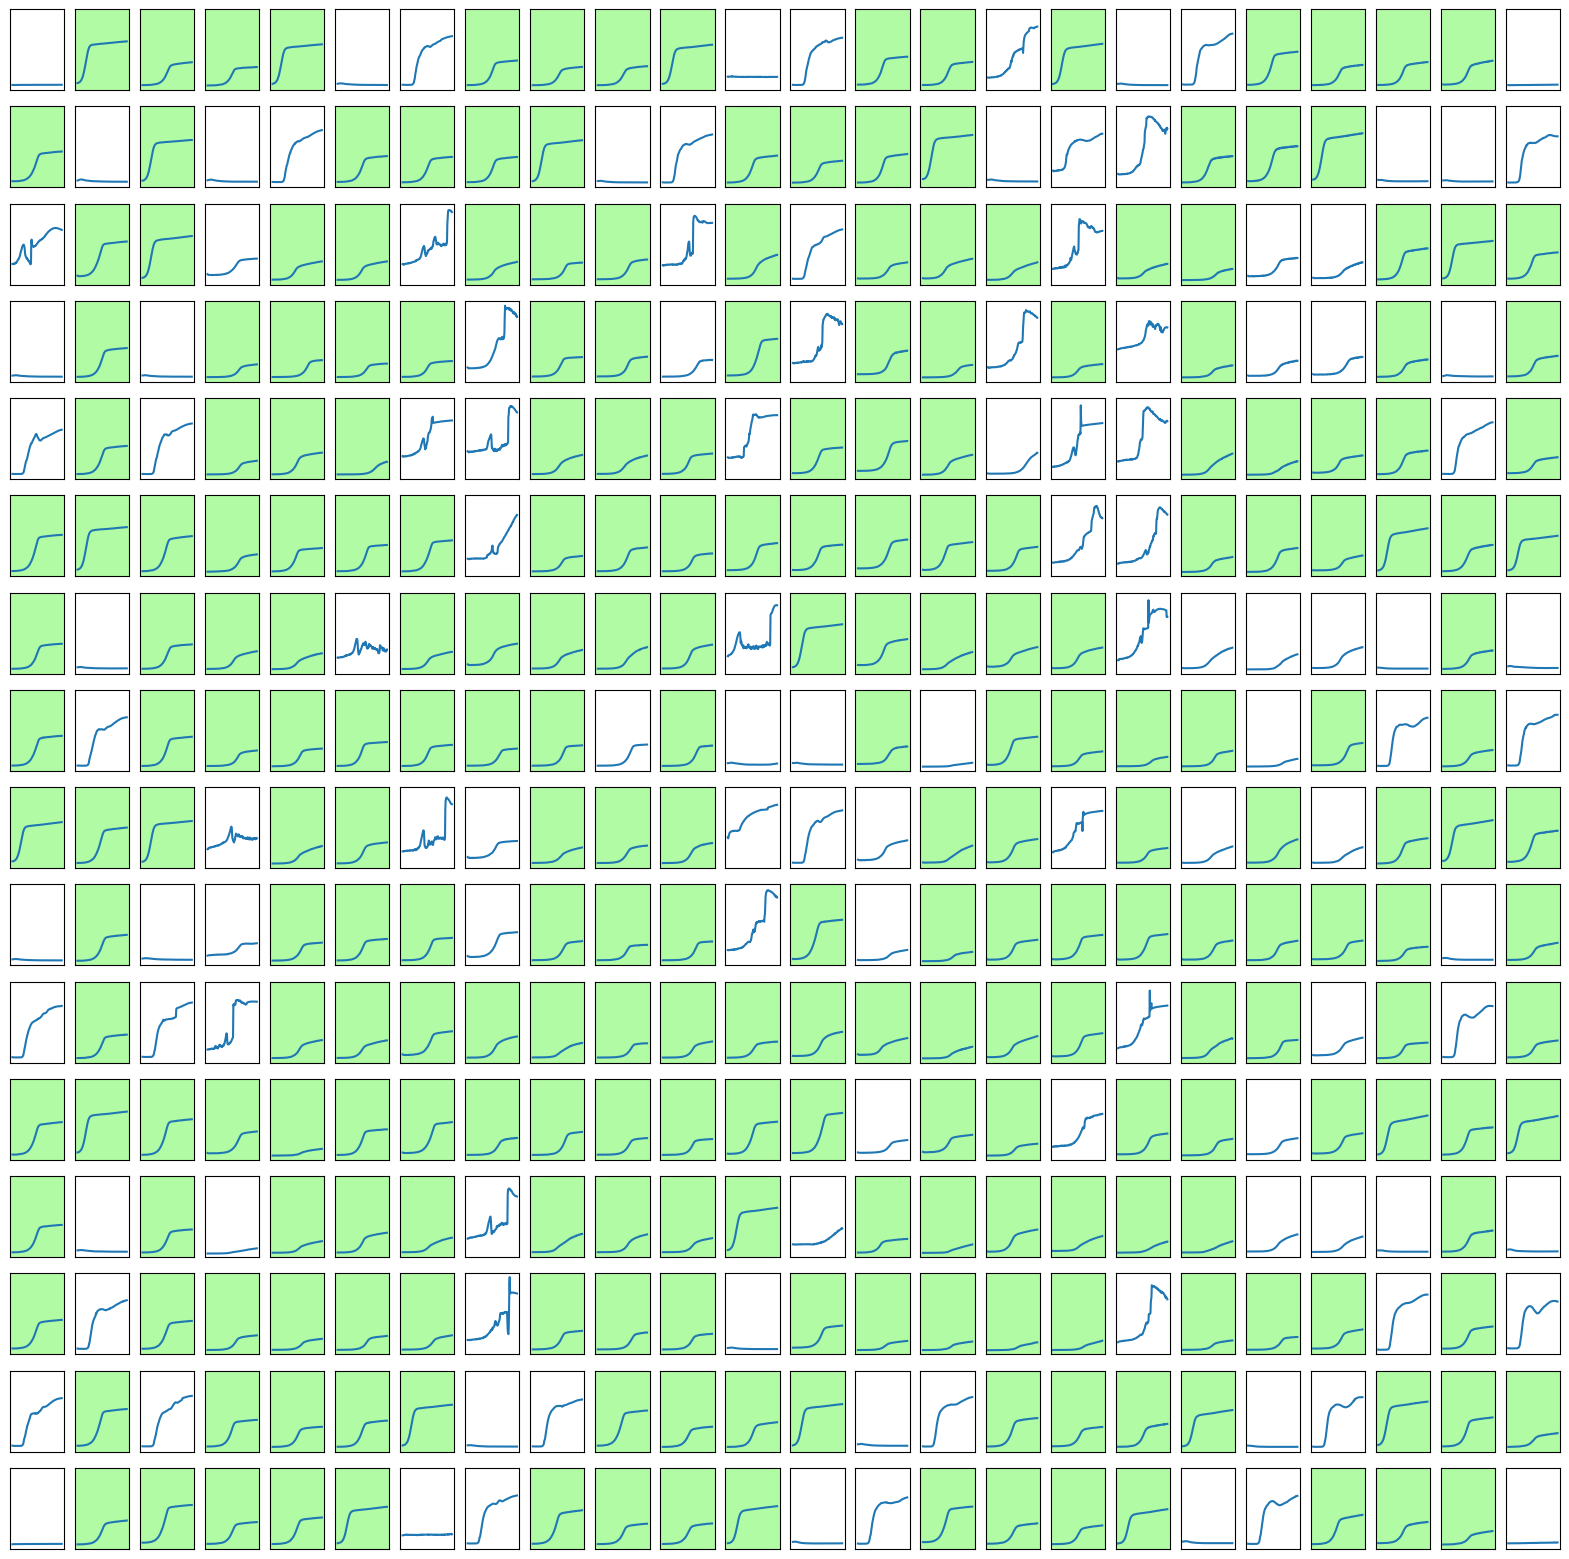

In [31]:
graph_df(df8,l8)

In [32]:
with open("3A.txt") as f:
    string9 = f.read()
l9 = string9.split()
l9 = list(set(l9))
len(l9)

234

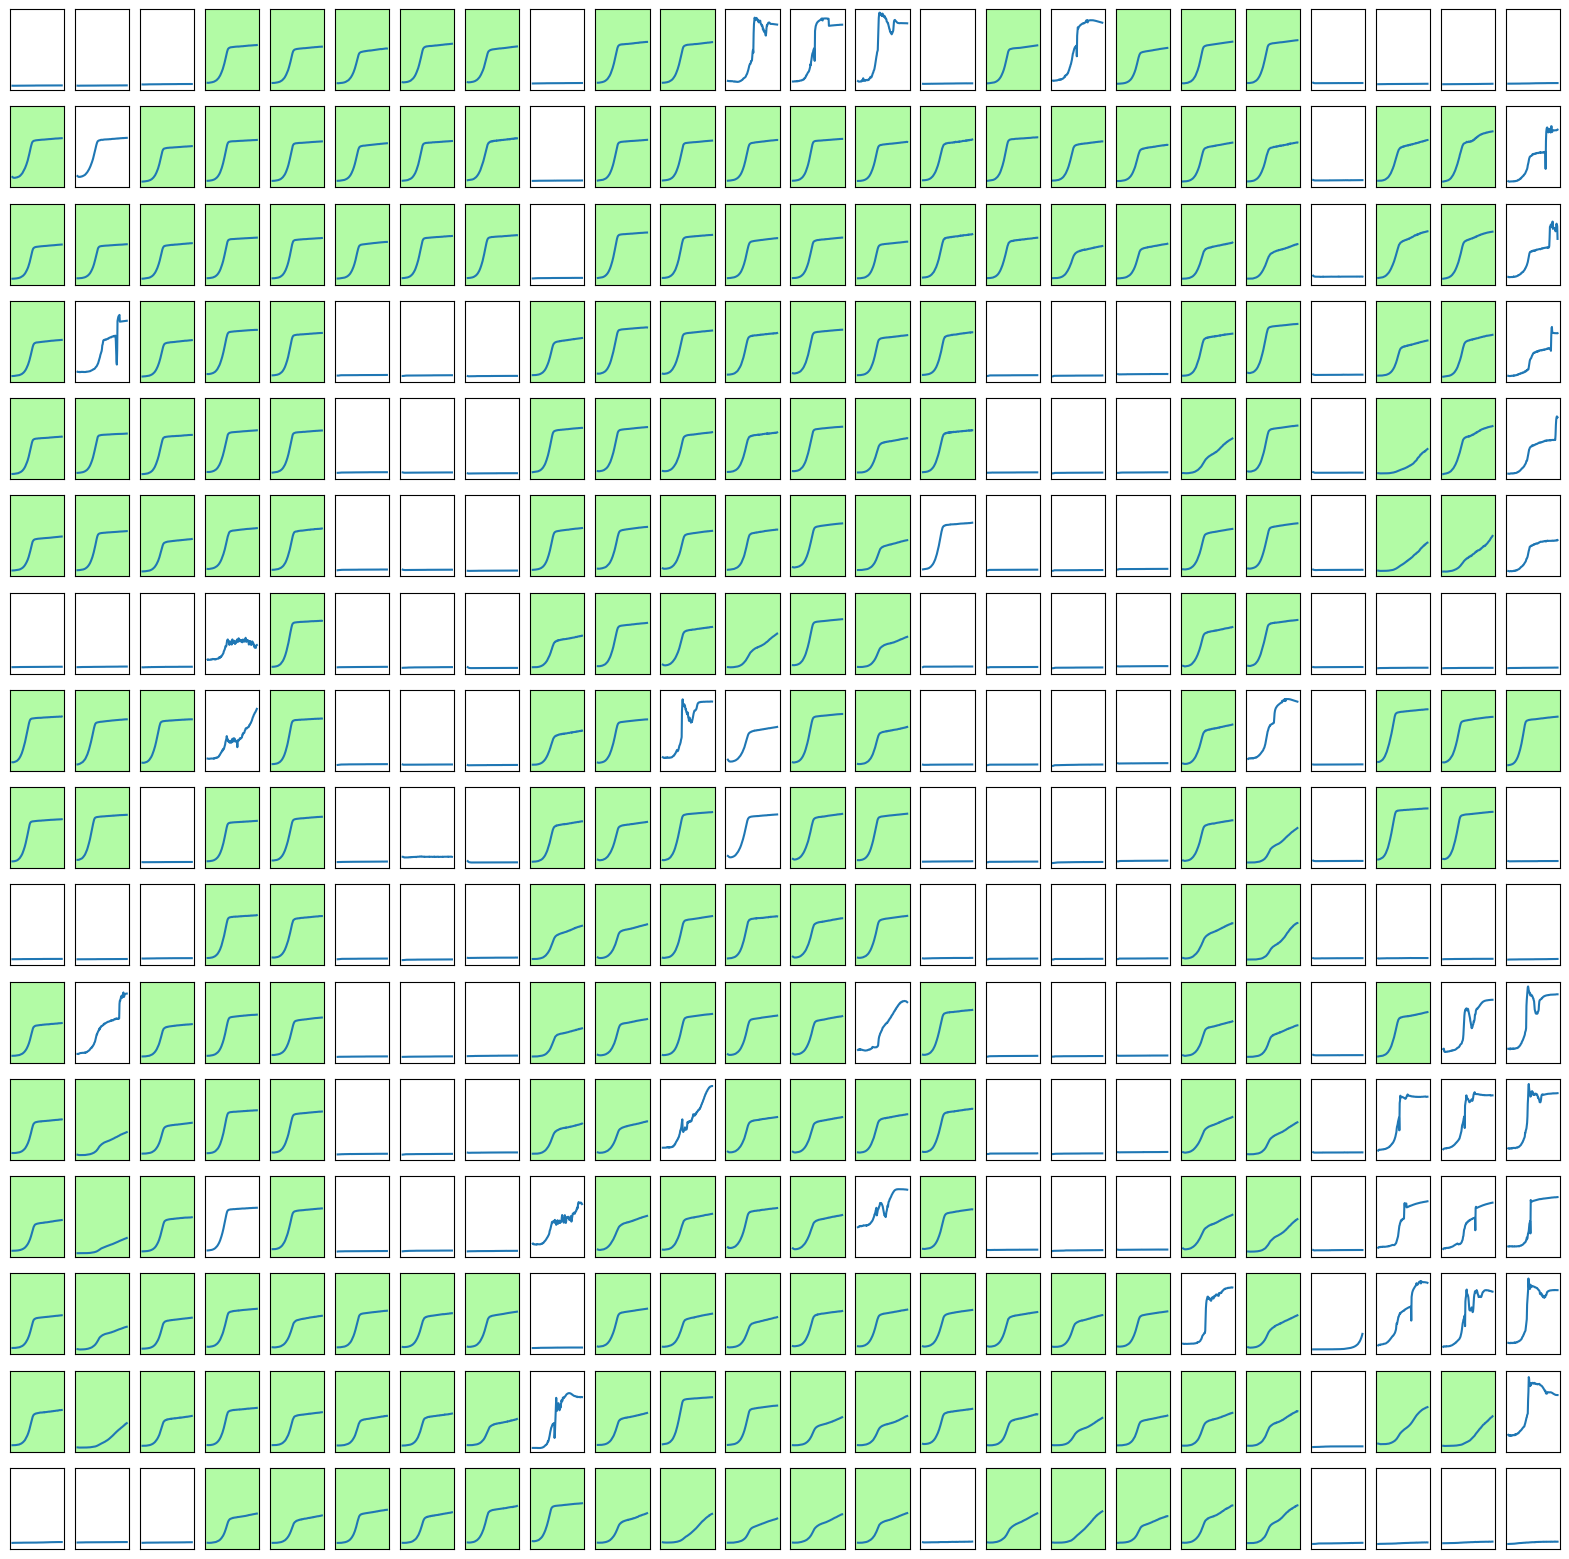

In [33]:
graph_df(df9, l9)